# Prepare Data

The first step in using submodlib is obviously to have some data at hand. Below we create a synthetic dataset of 500 points distributed across 10 clusters with a standard deviation of 4. In practice, each data point could correspond to images or video frames or any other dataset where subset selection is desired.

In [1]:
from sklearn.datasets import make_blobs
num_clusters = 100
cluster_std_dev = 4
points, cluster_ids, centers = make_blobs(n_samples=5000, centers=num_clusters, n_features=2, cluster_std=cluster_std_dev, center_box=(0,100), return_centers=True, random_state=4)
data = list(map(tuple, points))
xs = [x[0] for x in data]
ys = [x[1] for x in data]
import numpy as np
dataArray = np.array(data)

# Visualize Data

The visualization of the generated sample data shows the data points and the clusters.

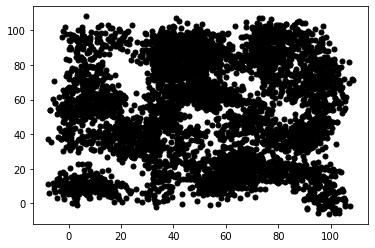

In [2]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys, s=25, color='black', label="Images")

# Preparing FacilityLocation Object

In [3]:
from submodlib.functions.facilityLocation import FacilityLocationFunction
obj = FacilityLocationFunction(n=5000, mode="dense", data=dataArray, metric="euclidean")

# NaiveGreedy Maximization

5.01 s ± 89.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2558, 36.0695915222168), (3314, 33.98683547973633), (3749, 32.73706817626953), (4061, 29.409761428833008), (207, 27.85492515563965), (2794, 27.6409969329834), (4898, 27.4133358001709), (2509, 26.272226333618164), (273, 25.87860870361328), (2031, 25.520891189575195)]


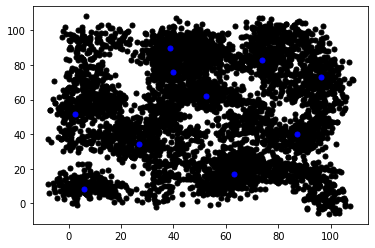

In [4]:
%timeit greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
greedyList = obj.maximize(budget=10, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazyGreedy Maximization

616 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2558, 36.0695915222168), (3314, 33.98683547973633), (3749, 32.73706817626953), (4061, 29.409761428833008), (207, 27.85492515563965), (2794, 27.6409969329834), (4898, 27.4133358001709), (2509, 26.272226333618164), (273, 25.87860870361328), (2031, 25.520891189575195)]


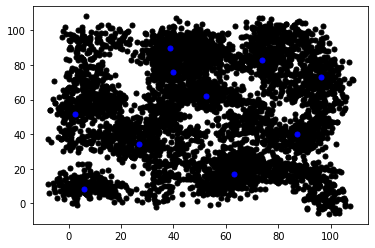

In [5]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
greedyList = obj.maximize(budget=10, optimizer='LazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# StochasticGreedy Maximization

1.58 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2558, 36.0695915222168), (3314, 33.98683547973633), (3749, 32.73706817626953), (611, 29.259315490722656), (3975, 27.705493927001953), (3294, 27.268306732177734), (1489, 27.139331817626953), (3734, 26.16584587097168), (4124, 25.548694610595703), (2031, 25.5212459564209)]


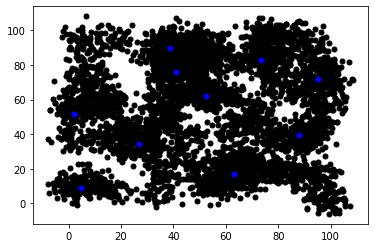

In [6]:
%timeit greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
greedyList = obj.maximize(budget=10, optimizer='StochasticGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

# LazierThanLazyGreedy Maximization

12.3 s ± 393 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy vector: [(2546, 35.88224792480469), (3493, 32.75632858276367), (2450, 32.58108901977539), (3242, 28.48222541809082), (2475, 27.662052154541016), (474, 27.58218765258789), (1165, 27.077802658081055), (3734, 26.165843963623047), (1148, 25.755184173583984), (154, 25.64693832397461)]


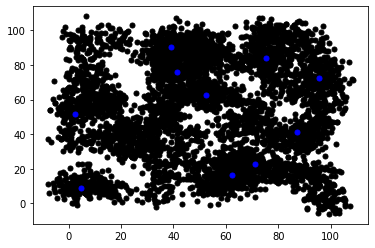

In [7]:
%timeit greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
greedyList = obj.maximize(budget=10, optimizer='LazierThanLazyGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbosity=False)
print(f"Greedy vector: {greedyList}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")